# Analyze Hyperparameter Tuning


In [49]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import json
import sys
FILENAME = "f_KNN_MUTAG_TEST_2024-06-26_15-52-52_results.csv"

In [50]:

filepath= "configs/results/Hyperparameter_tuning_results/HP_20251018_SVC_Trivial-GED_precomputed_PTC_FR.xlsx"

In [51]:

# # find the file in the directory
# filepath = None
# for root, dirs, files in os.walk("."):
#     if FILENAME in files:
#         filepath = os.path.join(root, FILENAME)
#         break


In [52]:
hyper_df = pd.read_excel(filepath)
display(len(hyper_df))
display(hyper_df.head(10))

1050

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_class_weight,param_kernel_type,param_llambda,param_similarity_function,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,fold_index
0,0.043934,0.010575,0.015908,0.004980,0.017145,NaN,precomputed,0.351356,k1,"{'C': 0.017144831423046965, 'class_weight': No...",0.348837,0.416667,0.470449,0.479876,0.377778,0.418721,0.050951,10,0
1,0.023657,0.000226,0.009504,0.000207,0.006132,NaN,precomputed,99.082453,k1,"{'C': 0.006132286573997627, 'class_weight': No...",0.348837,0.416667,0.416667,0.479876,0.377778,0.407965,0.044114,16,0
2,0.023600,0.000227,0.009632,0.000222,0.084987,balanced,precomputed,0.022011,k1,"{'C': 0.08498681728535162, 'class_weight': 'ba...",0.362602,0.416667,0.479876,0.397849,0.377778,0.406954,0.040776,17,0
3,0.041632,0.003897,0.017421,0.000113,0.002223,balanced,precomputed,4.778685,k4,"{'C': 0.0022229393453459213, 'class_weight': '...",0.341176,0.416667,0.416667,0.416667,0.370787,0.392393,0.031169,58,0
4,0.028867,0.012002,0.010981,0.003984,0.321707,NaN,precomputed,0.393029,k2,"{'C': 0.3217071691932495, 'class_weight': None...",0.348837,0.416667,0.416667,0.416667,0.377778,0.395323,0.027696,31,0
5,0.047677,0.004770,0.017705,0.004112,0.192563,NaN,precomputed,15.404952,k1,"{'C': 0.19256258060953022, 'class_weight': Non...",0.348837,0.416667,0.470449,0.416667,0.377778,0.406079,0.041098,20,0
6,0.034652,0.011464,0.014444,0.005589,0.003748,balanced,precomputed,2.405698,k1,"{'C': 0.0037476424154776413, 'class_weight': '...",0.341176,0.416667,0.416667,0.416667,0.377778,0.393791,0.030314,52,0
7,0.023931,0.000557,0.008868,0.000091,0.250062,NaN,precomputed,89.144190,k2,"{'C': 0.25006195017137683, 'class_weight': Non...",0.348837,0.416667,0.416667,0.416667,0.370787,0.393925,0.028705,43,0
8,0.037177,0.011445,0.015803,0.004915,1.203014,balanced,precomputed,45.851934,k1,"{'C': 1.203013513925191, 'class_weight': 'bala...",0.333333,0.416667,0.416667,0.416667,0.377778,0.392222,0.033073,63,0
9,0.046068,0.004195,0.017674,0.004841,0.971753,NaN,precomputed,0.031498,k2,"{'C': 0.9717533196201915, 'class_weight': None...",0.333333,0.416667,0.416667,0.410526,0.370787,0.389596,0.032933,69,0


In [53]:
results_column ="mean_test_score"

In [54]:
# a function that gets two column names form the df, one result column, which represents the score, and one regarding a certain hyperparameter.
# this second parameter, can be categorical or numerical.
# if its categorical, i want a box plot, plotting the mean and max score for each category
# if its numerical, i want a scatter plot, plotting the score against the hyperparameter value
def plot_hyperparameter_effect(hyper_df, hyperparameter_column, results_column, Model_Name):
    if hyperparameter_column not in hyper_df.columns:
        print(f"Column {hyperparameter_column} not found in DataFrame.")
        return
    if results_column not in hyper_df.columns:
        print(f"Column {results_column} not found in DataFrame.")
        return

    # check if the hyperparameter column is numerical or categorical
    plt.figure(figsize=(10, 6))
    plt.title(f'{Model_Name} - Effect of {hyperparameter_column} on {results_column}')

    if pd.api.types.is_numeric_dtype(hyper_df[hyperparameter_column]):
        # numerical, scatter plot
        
        sns.scatterplot(data=hyper_df, x=hyperparameter_column, y=results_column)
        # add a line plot for better visibility
        sns.lineplot(data=hyper_df, x=hyperparameter_column, y=results_column, errorbar=None, color='orange')
        sns.regplot(data=hyper_df, x=hyperparameter_column, y=results_column, scatter=False, color='green', label='Trend Line')
        plt.xlabel(hyperparameter_column)
        plt.ylabel(results_column)
        plt.grid(True)
        plt.show()
    else:
        # categorical, bor plot
        # summary_df = hyper_df.groupby(hyperparameter_column)[results_column].agg(['mean', 'max']).reset_index()
        # summary_df = summary_df.melt(id_vars=hyperparameter_column, value_vars=['mean', 'max'], var_name='Statistic', value_name='Score')

        # Use violinplot for richer distribution visualization
        sns.violinplot(data=hyper_df, x=hyperparameter_column, y=results_column, inner="box", density_norm='width')
        # Overlay mean and max points for each category
        summary_df = hyper_df.groupby(hyperparameter_column)[results_column].agg(['mean', 'max']).reset_index()
        sns.scatterplot(data=summary_df, x=hyperparameter_column, y="mean", color="blue", label="Mean", marker="o", s=100, zorder=10)
        sns.scatterplot(data=summary_df, x=hyperparameter_column, y="max", color="red", label="Max", marker="X", s=100, zorder=10)
        plt.xlabel(hyperparameter_column)
        plt.ylabel(results_column)
        plt.legend(title='Statistic')
        plt.xticks(rotation=45)
        plt.grid(axis='y')
        plt.show()

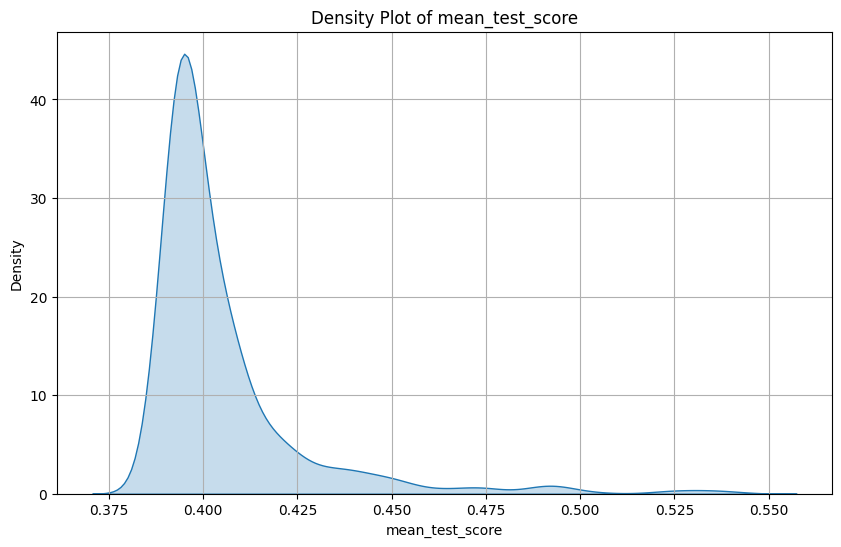

In [55]:
# plot the desity of the results collumn
plt.figure(figsize=(10, 6))
plt.title(f'Density Plot of {results_column}')
sns.kdeplot(data=hyper_df, x=results_column, fill=True)
plt.xlabel(results_column)
plt.ylabel('Density')
plt.grid(True)
plt.show()

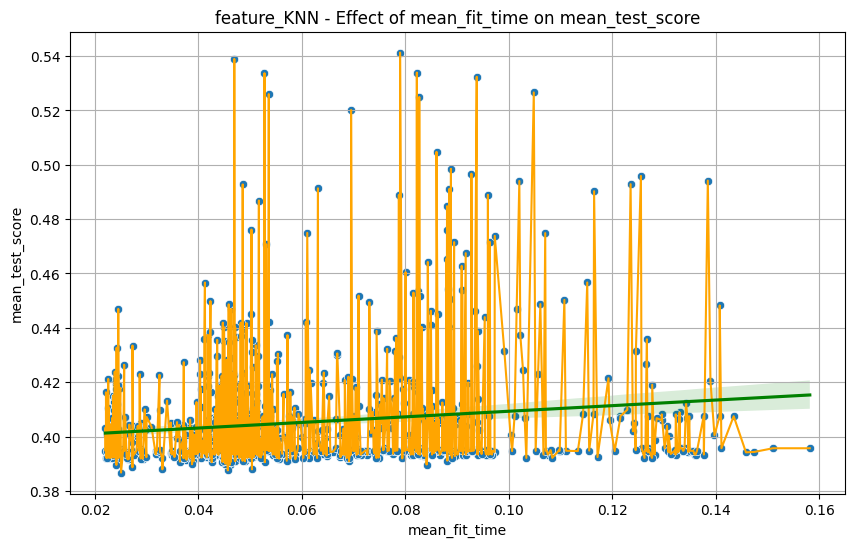

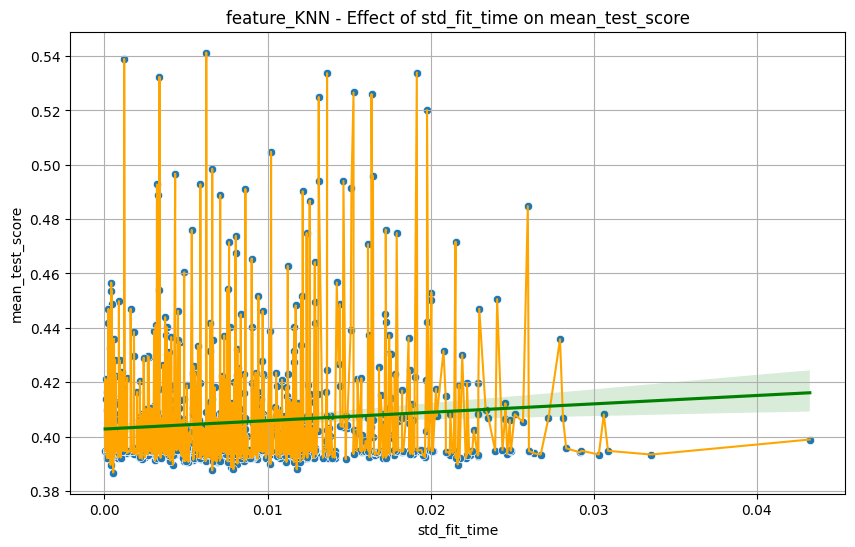

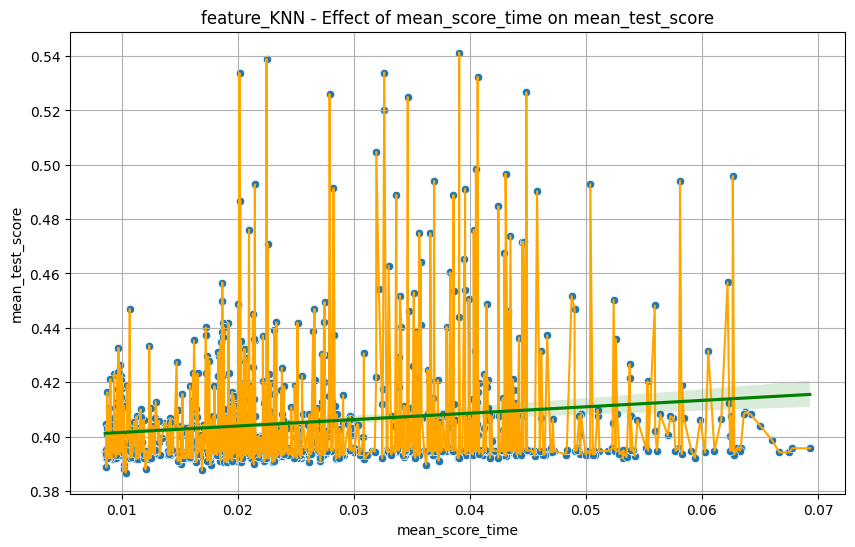

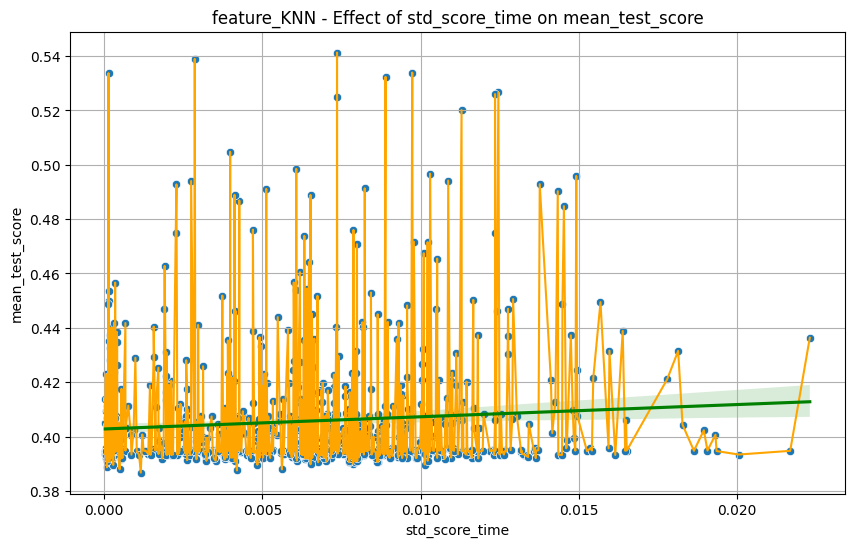

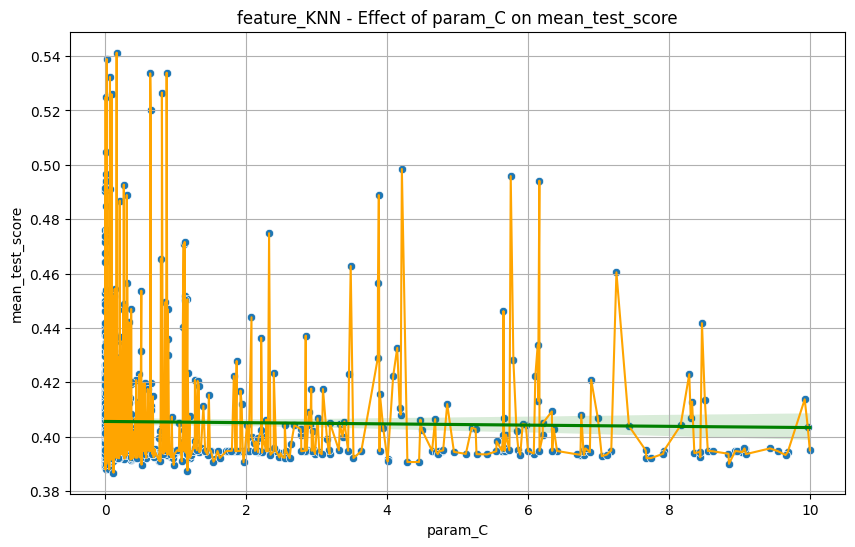

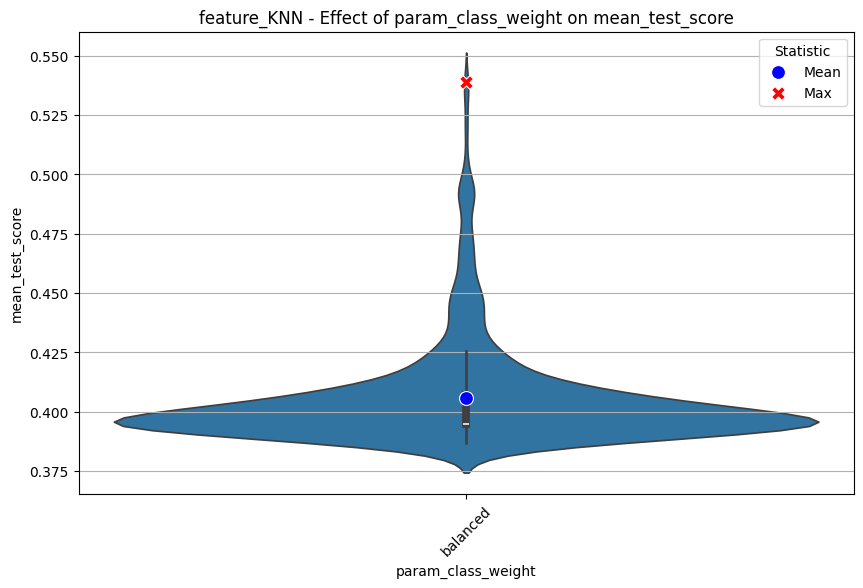

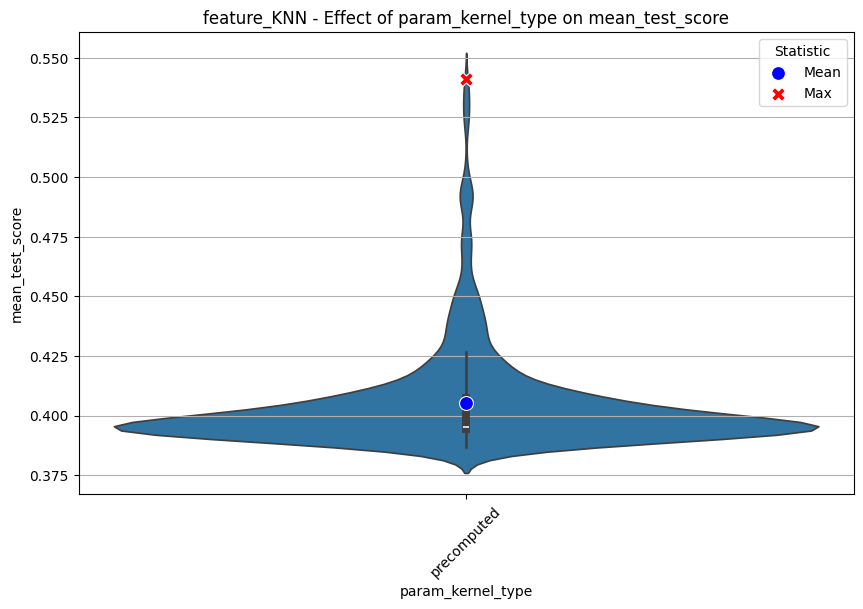

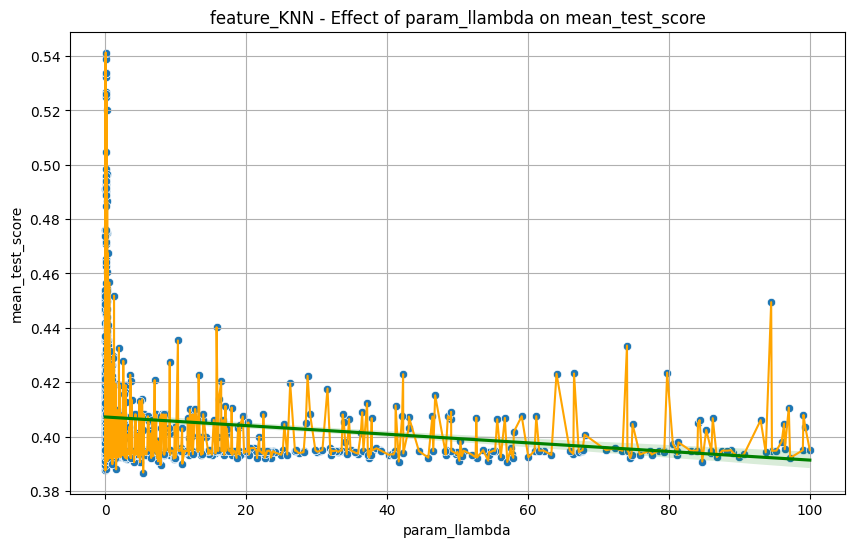

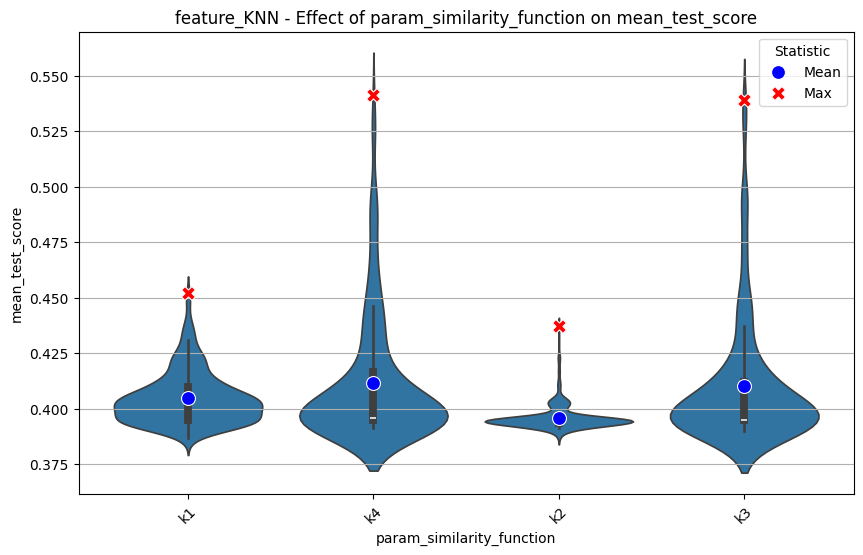

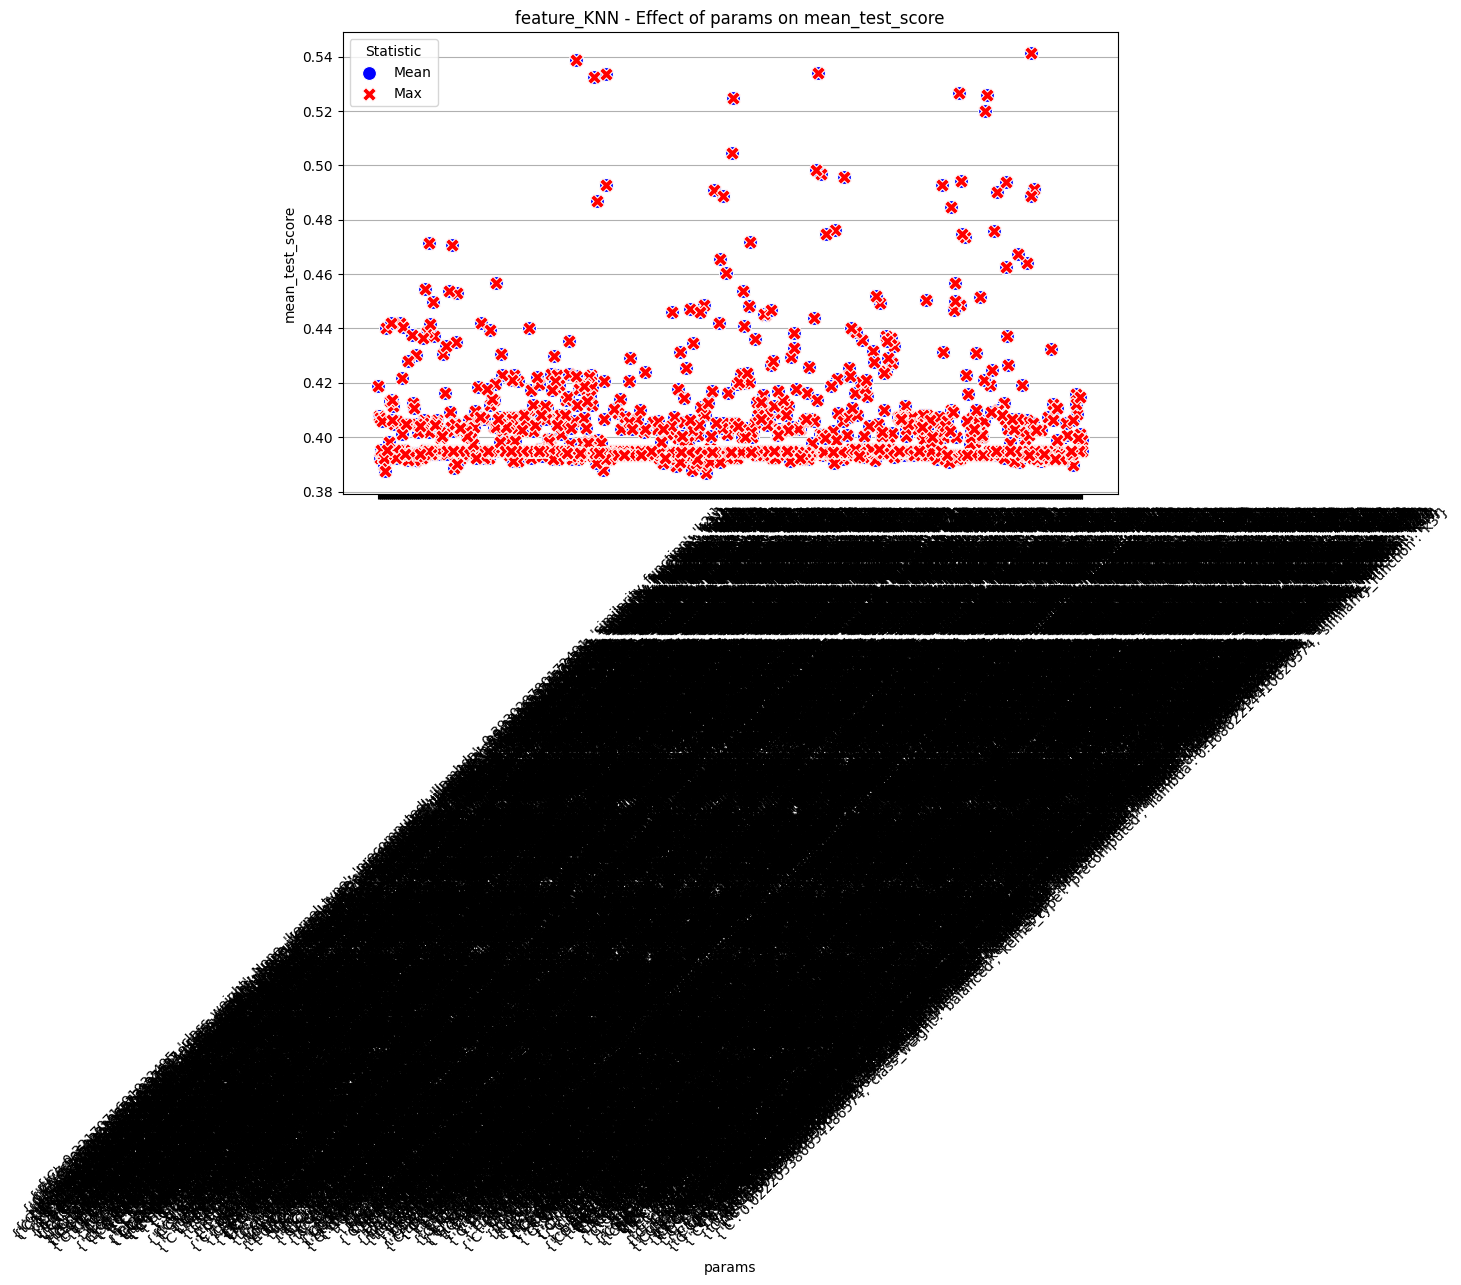

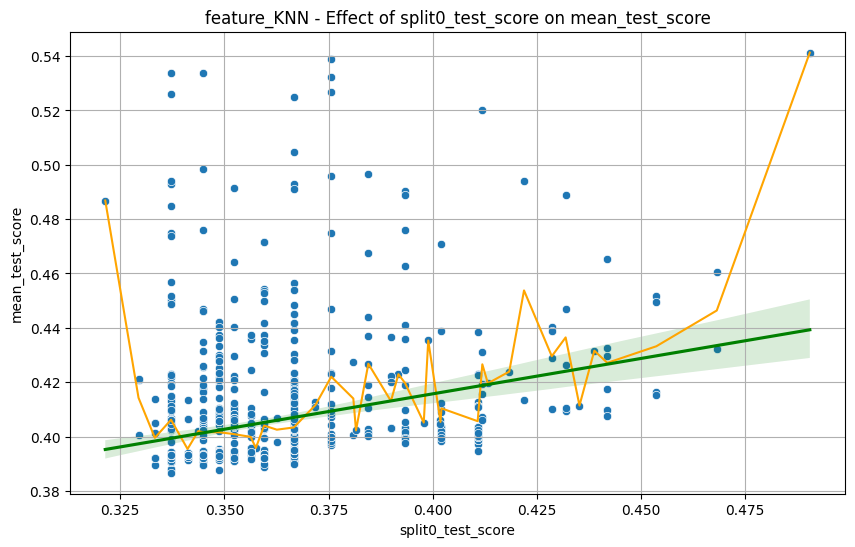

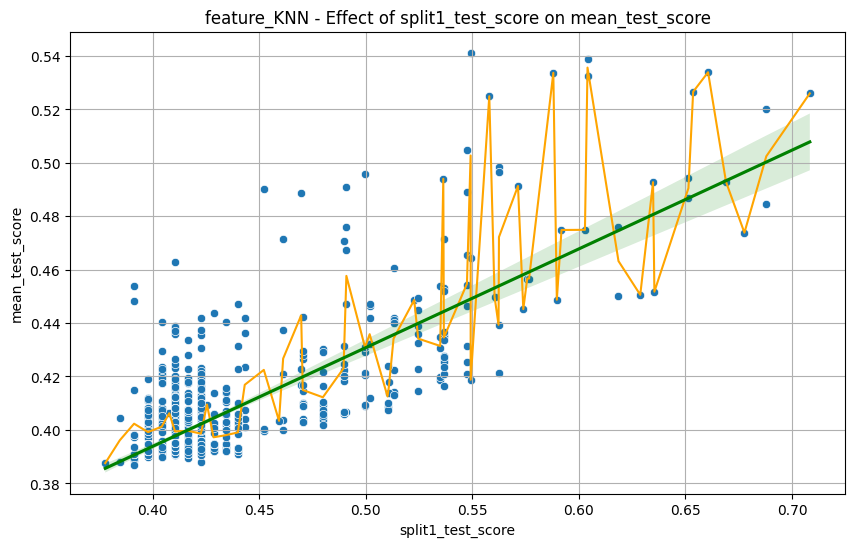

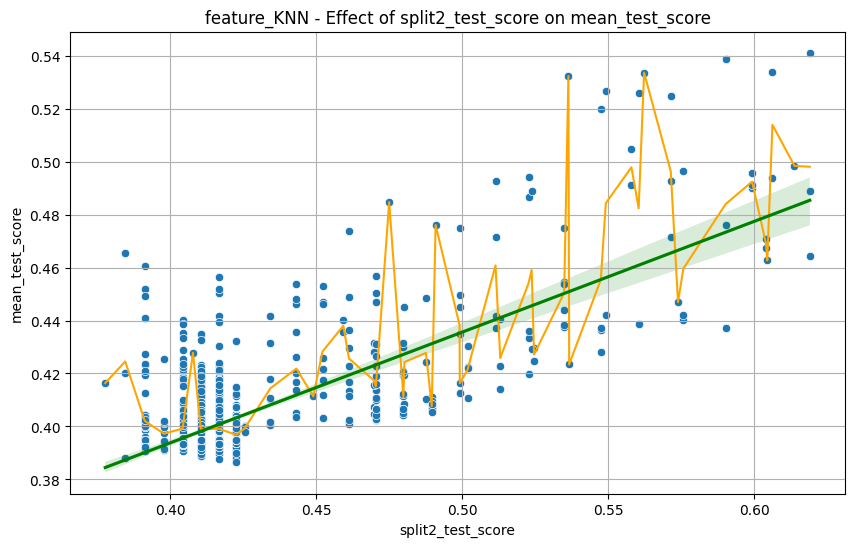

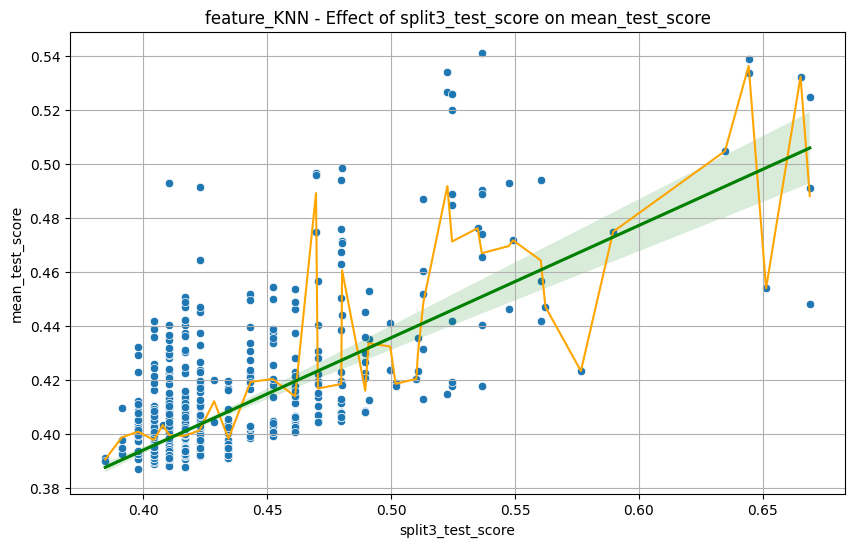

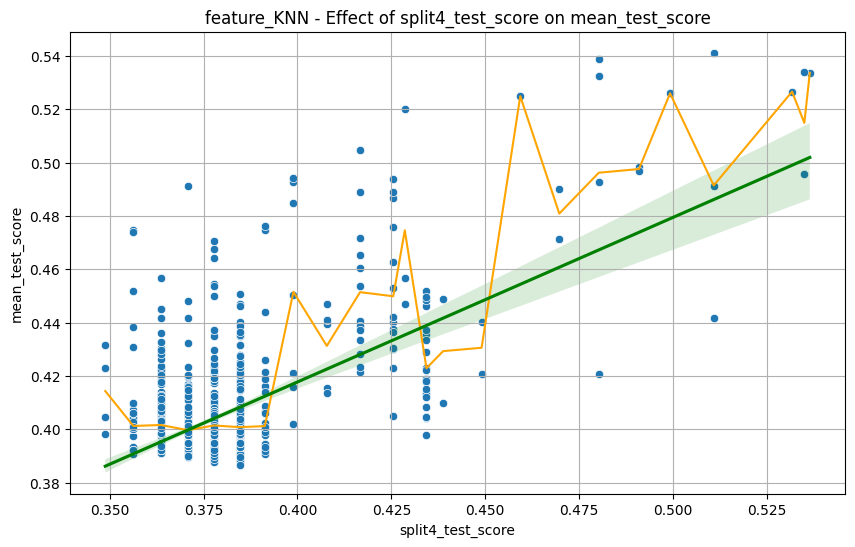

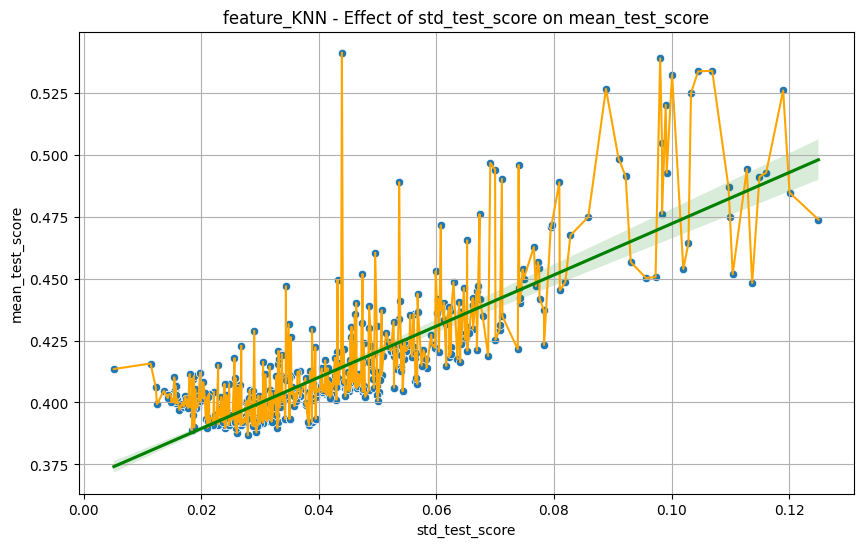

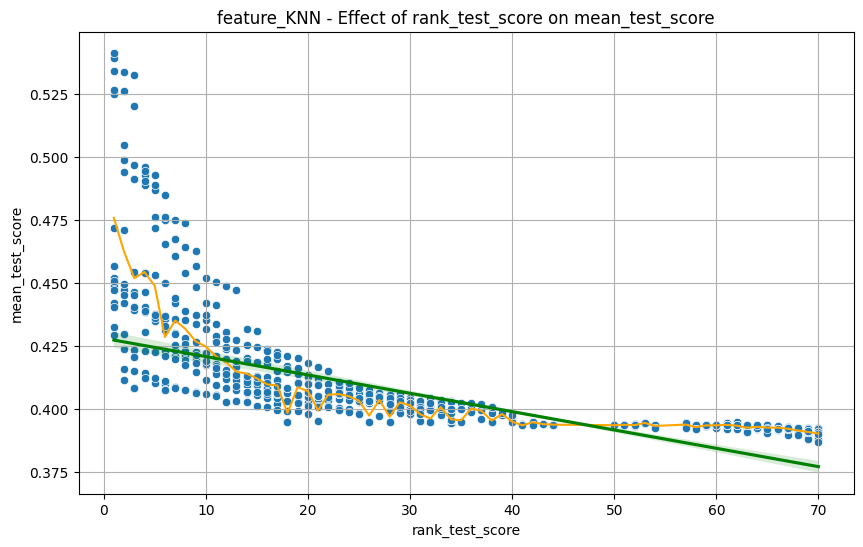

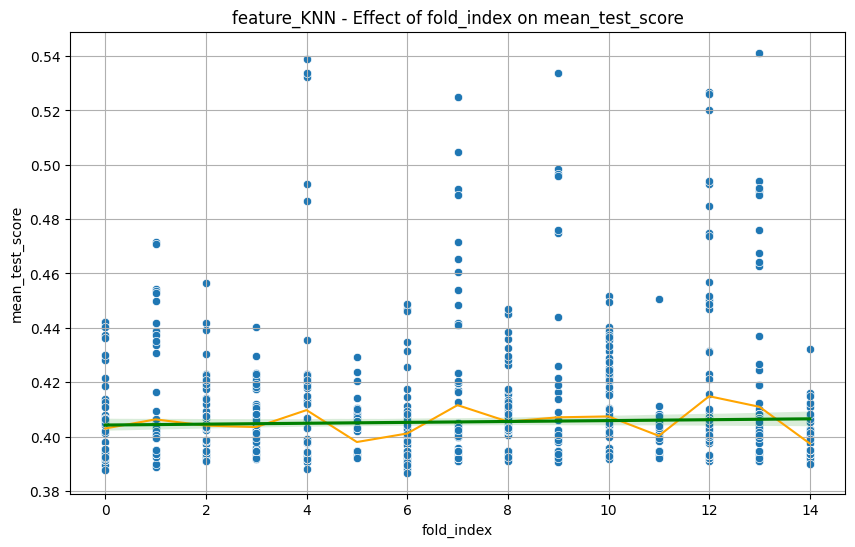

In [56]:
results_column = "mean_test_score"
Model_Name = "feature_KNN"

# possible filter
# hyper_df = hyper_df[hyper_df["param_similarity_function"] == "k4" ]

for col in hyper_df.columns:
    if col != results_column:
        plot_hyperparameter_effect(hyper_df, col, results_column, Model_Name)

In [57]:
display(hyper_df.sort_values(by='mean_test_score', ascending=False).head(30))

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_class_weight,param_kernel_type,param_llambda,param_similarity_function,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,fold_index
973,0.078974,0.006242,0.039086,0.007358,0.162217,NaN,precomputed,0.072307,k4,"{'C': 0.16221680973664804, 'class_weight': Non...",0.490478,0.549195,0.619048,0.536643,0.510805,0.541234,0.043912,1,13
294,0.046932,0.001210,0.022491,0.002864,0.022490,balanced,precomputed,0.059744,k3,"{'C': 0.022489853535283103, 'class_weight': 'b...",0.375659,0.604040,0.590244,0.644358,0.480215,0.538903,0.098074,1,4
655,0.082221,0.019153,0.032620,0.009734,0.871818,balanced,precomputed,0.071067,k3,"{'C': 0.8718180956299181, 'class_weight': 'bal...",0.344828,0.660606,0.606250,0.522727,0.534929,0.533868,0.106924,1,9
340,0.052769,0.013649,0.020162,0.000141,0.638195,NaN,precomputed,0.064582,k3,"{'C': 0.6381949885598854, 'class_weight': None...",0.337209,0.588002,0.562299,0.644358,0.536383,0.533650,0.104525,2,4
321,0.093798,0.003374,0.040680,0.008890,0.067513,NaN,precomputed,0.069444,k3,"{'C': 0.06751326499116841, 'class_weight': Non...",0.375659,0.604040,0.536383,0.665287,0.480215,0.532317,0.100098,3,4
866,0.104826,0.015273,0.044868,0.012454,0.804063,NaN,precomputed,0.159835,k4,"{'C': 0.8040625760361223, 'class_weight': None...",0.375659,0.653608,0.549195,0.522727,0.531661,0.526570,0.088843,1,12
907,0.053600,0.016376,0.027922,0.012349,0.090459,NaN,precomputed,0.179013,k4,"{'C': 0.09045865981224667, 'class_weight': Non...",0.337209,0.708333,0.560440,0.524618,0.499187,0.525957,0.118991,2,12
528,0.082686,0.013141,0.034654,0.007356,0.005722,NaN,precomputed,0.065189,k4,"{'C': 0.005721762662982341, 'class_weight': No...",0.366667,0.557956,0.571429,0.669031,0.459310,0.524878,0.103316,1,7
904,0.069507,0.019778,0.032618,0.011291,0.645039,balanced,precomputed,0.201855,k3,"{'C': 0.6450385093166966, 'class_weight': 'bal...",0.411905,0.687926,0.547475,0.524618,0.428571,0.520099,0.099014,3,12
527,0.086025,0.010215,0.031943,0.003982,0.005859,balanced,precomputed,0.102434,k4,"{'C': 0.005859171151125743, 'class_weight': 'b...",0.366667,0.547475,0.557956,0.634783,0.416667,0.504709,0.098377,2,7
